# Exercise 1

In this exercise, we work with the California Housing dataset, which is included in sklearn. It is a collection of average house prices per block, while each block is also characterized by 8 features:

|Feature name | description|
|-------------|------------|
|MedInc | median income in block|
|HouseAge | median house age in block|
|AveRooms | average number of rooms|
|AveBedrms | average number of bedrooms|
|Population | block population|
|AveOccup | average house occupancy|
|Latitude | house block latitude|
|Longitude | house block longitude|

We can download the data with:

In [6]:
from sklearn.datasets import fetch_california_housing

(X, y) = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=True)

X and y are the features and the label, respectively. We can look at the format of the data:

In [7]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(20640, 8)
(20640,)
float64
float64


As you can see, X and y are numpy arrays. There are a total of 20640 samples in the dataset. X has 8 features per sample, and y are the corresponding labels.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

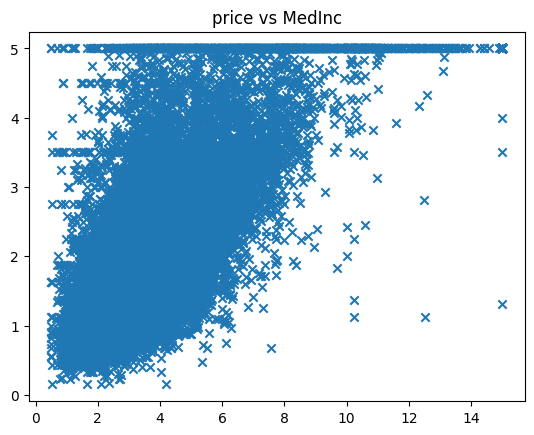

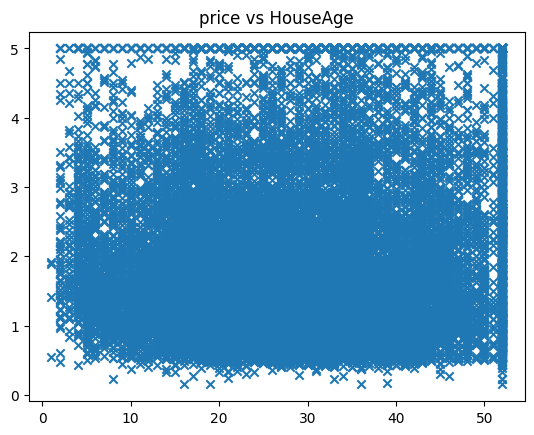

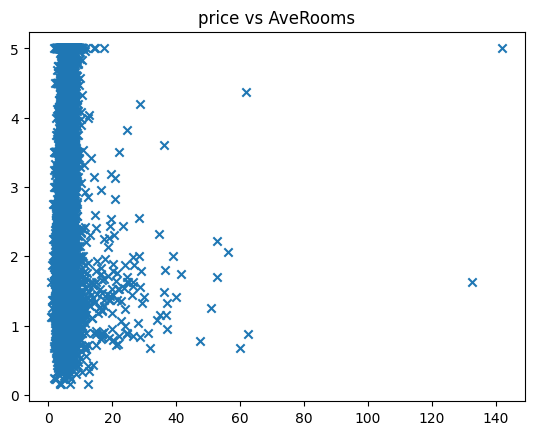

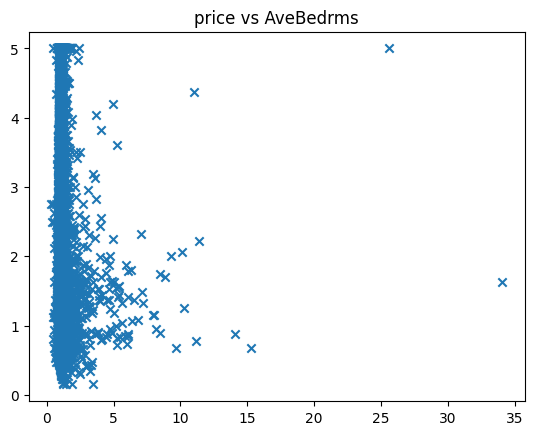

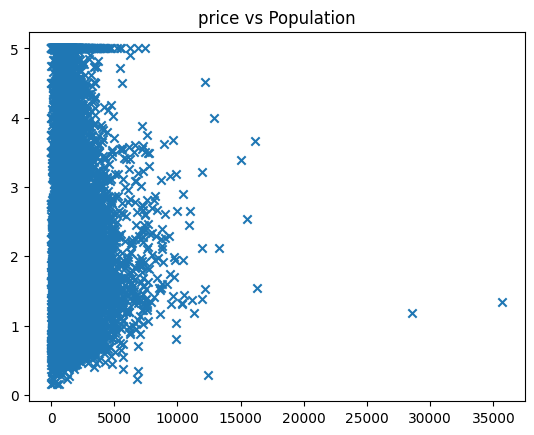

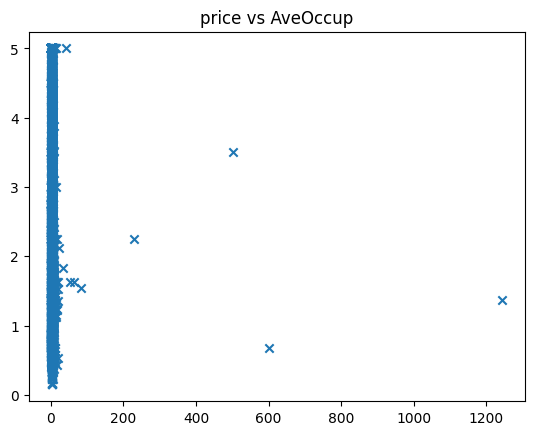

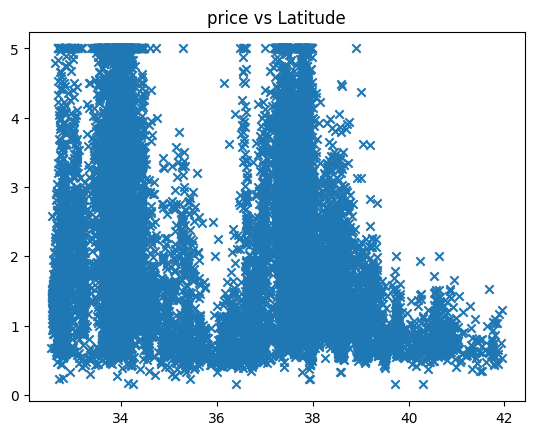

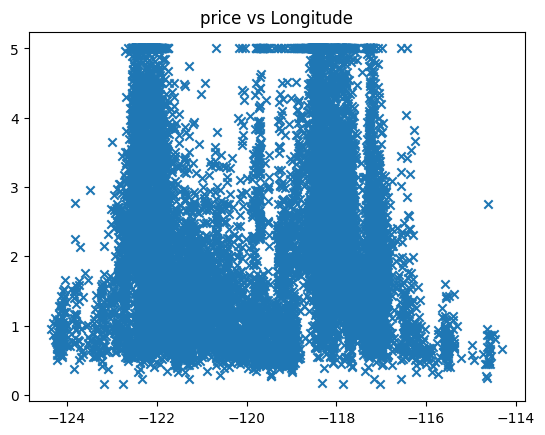

In [9]:
features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"]

for i, feature_name in enumerate(features):
    plt.figure()
    plt.title(f"price vs {feature_name}")
    plt.scatter(X[:, i], y, marker="x")
    plt.show()

We can see that the data is non-linear, which means that a linear regression will probably not yield the best results. But we can do it anyway and see how good it performs.

Also, this dataset has more dimensions than the example, which was 2D. But linear regression works still the same. Instead of one input variable we now have eight input variables, to calculate the output (the price). The linear regression will find a factor $\alpha_{var}$ for each input variable $var$ plus a bias $b$. This means, we assume that the price can be calculated in the following form:

\begin{equation}
  price = \alpha_{MedInc} MedInc + \alpha_{HouseAge} HouseAge + \ldots + \alpha_{Longitude} Longitude + b
\end{equation}

Your tasks in this notebook are:
    
- Add and adapt the numpy linear regression code from the other regression notebook, so that it performs linear regression on the California Housing dataset. If performed correctly, you should be able to get an MSE of ca. 0.5243. You can use sklearn to get a quick solution, but also implement the manual solution (without sklearn).

## Solution

Linear regression with sklearn

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [11]:
#print learned coefficients and bias
print("Learned coefficients (sklearn):", reg.coef_)
print("Learned bias (sklearn):", reg.intercept_)

Learned coefficients (sklearn): [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Learned bias (sklearn): -36.94192020718445


In [12]:
#predict housing prices using the fitted model
y_pred_sklearn = reg.predict(X)

In [13]:
#Calculating MSE for sklearn model
from sklearn.metrics import mean_squared_error
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print("MSE (sklearn):", mse_sklearn)

MSE (sklearn): 0.5243209861846072


Visualization of result

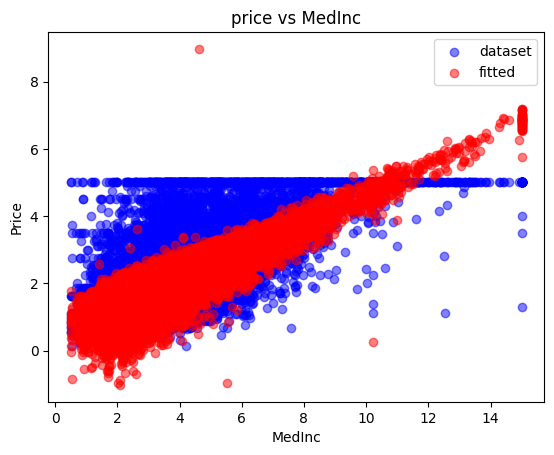

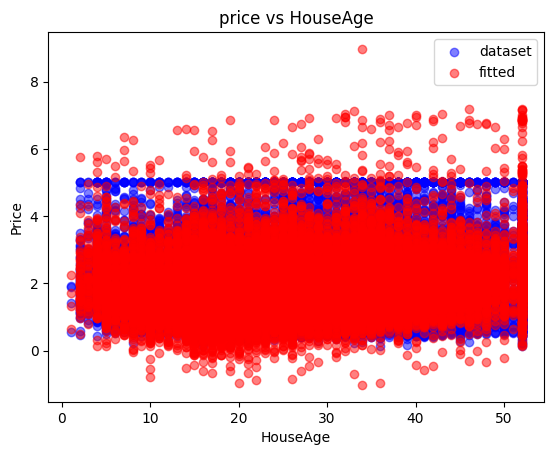

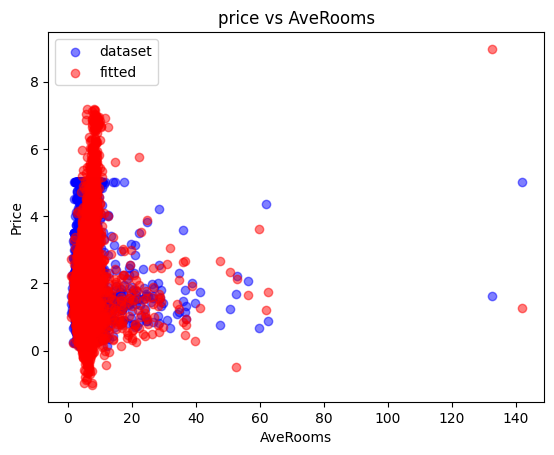

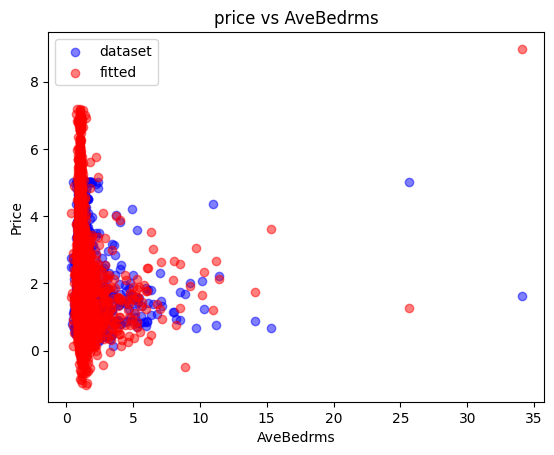

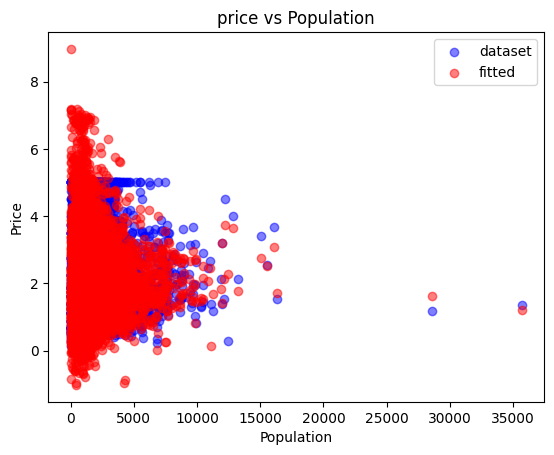

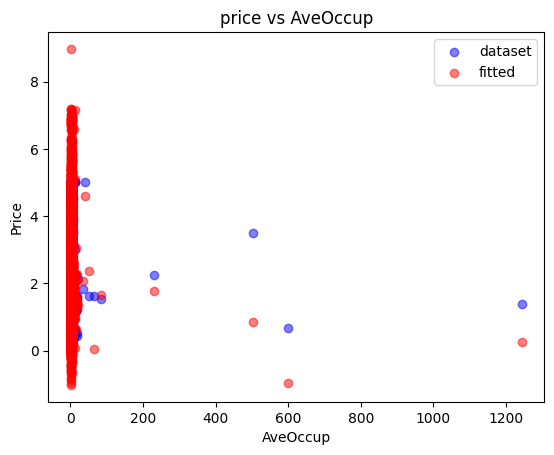

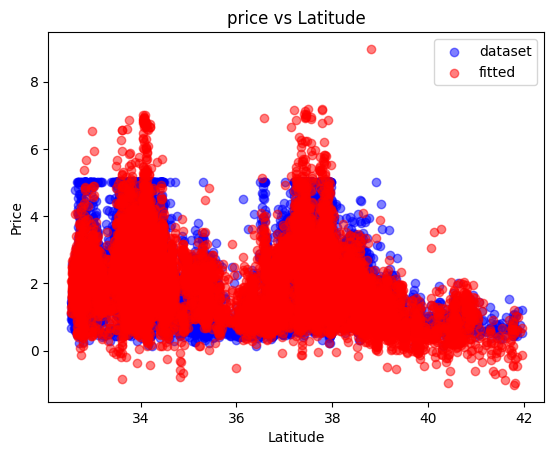

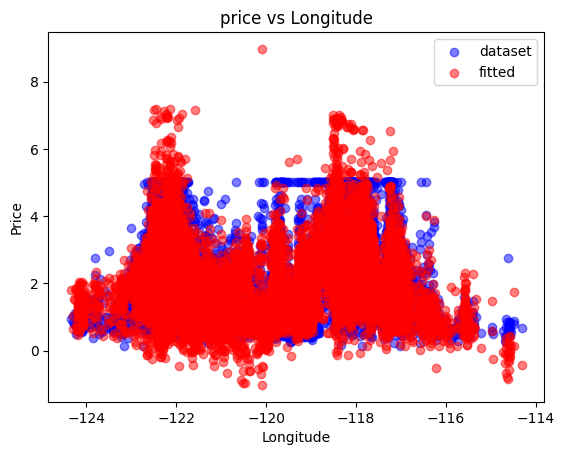

In [14]:
for i, feature_name in enumerate(features):
    plt.figure()
    plt.scatter(X[:, i], y, label='dataset', alpha=0.5, color='blue')  #Actual data
    plt.scatter(X[:, i], y_pred_sklearn, label='fitted', alpha=0.5, color='red')  #Predictions
    plt.title(f"price vs {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Price")
    plt.legend()
    plt.show()

Manual Linear Regression using numpy

In [15]:
import numpy as np
ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset
print(X_)

[[   8.3252       41.            6.98412698 ...   37.88
  -122.23          1.        ]
 [   8.3014       21.            6.23813708 ...   37.86
  -122.22          1.        ]
 [   7.2574       52.            8.28813559 ...   37.85
  -122.24          1.        ]
 ...
 [   1.7          17.            5.20554273 ...   39.43
  -121.22          1.        ]
 [   1.8672       18.            5.32951289 ...   39.43
  -121.32          1.        ]
 [   2.3886       16.            5.25471698 ...   39.37
  -121.24          1.        ]]


In [16]:
weights = (np.linalg.pinv(X_.T @ X_) @ X_.T) @ y
print(weights.shape)

(9,)


In [17]:
#Split the weights into coefficients and bias
coefficients_manual = weights[:-1]  #Coefficients for features
bias_manual = weights[-1]  #bias

print(f"Learned Coefficients: {coefficients_manual}")
print(f"Learned Bias: {bias_manual}")

Learned Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Learned Bias: -36.94192020779689


In [18]:
#Calculate MSE for manual method
y_pred_manual = X_ @ weights #manually calculated weights
mse_manual = np.mean(np.power(y - y_pred_manual, 2))

print("MSE (using numpy):", mse_manual)



MSE (using numpy): 0.5243209861846072
